<a href="https://colab.research.google.com/github/raz0208/Techniques-For-Text-Analysis/blob/main/tf_idf_SimpleImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TF-IDF (Term Frequency-Inverse Document Frequency)

It’s a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (also called a corpus).

### Let’s break it down:
- Term Frequency (TF): Measures how often a term $t$ (word) appears in a document $d$:

$$
TF(t,d)=\frac{\text{Number of times term } t \text{ appears in } d}{\text{Total number of terms in } d}
$$

- Inverse Document Frequency (IDF): Measures how unique or rare a word is across all documents in the corpus.

$$
IDF(t,D)=log\frac{\text{Total number of documents in} D}{1+\text{Number of documents containig} t}
$$

### Step 1: Import libraries and read dataset

In [37]:
# Import required libriaries
import numpy as np
import math
import pandas as pd
from collections import Counter

In [31]:
# Read the dataset (Simple text or files such as txt, pdf, and etc.)
document_1 = [
    """In the heart of the city, where the streets hum with the rhythm of daily life, a small café stood nestled
    between towering buildings. The aroma of freshly brewed coffee mingled with the crisp morning air, drawing in
    early risers and weary travelers alike. Inside, the café buzzed with quiet conversations, the clinking of cups,
    and the occasional rustle of newspaper pages.""",

    """Among the patrons sat an old man, his eyes filled with the weight of years, gazing out the window as the world
    passed by. Across from him, a young woman typed furiously on her laptop, her brow furrowed in concentration.
    The barista, a cheerful fellow with a knack for remembering names, moved gracefully behind the counter,
    crafting intricate patterns in the frothy tops of cappuccinos.""",

    """As the morning stretched into afternoon, the café remained a sanctuary—a temporary escape from the relentless
    pace of the world outside. The city continued its symphony of honking horns and hurried footsteps, but within
    these walls, time seemed to slow, allowing stories to unfold in whispered exchanges and silent reflections."""
]

### Step 2: Tokenization & Vocabulary Creation
- Tokenize the corpus (corpus_tokenizer).
- Build a vocabulary (build_vocab).
- Get the total document count (docs_count).

In [32]:
# Tokenize the corpus (by corpus_tokenizer function)
def corpus_tokenizer(doc):
    return [doc.lower().split() for doc in doc]

tokenized_doc = corpus_tokenizer(document_1)
print(tokenized_doc)

[['in', 'the', 'heart', 'of', 'the', 'city,', 'where', 'the', 'streets', 'hum', 'with', 'the', 'rhythm', 'of', 'daily', 'life,', 'a', 'small', 'café', 'stood', 'nestled', 'between', 'towering', 'buildings.', 'the', 'aroma', 'of', 'freshly', 'brewed', 'coffee', 'mingled', 'with', 'the', 'crisp', 'morning', 'air,', 'drawing', 'in', 'early', 'risers', 'and', 'weary', 'travelers', 'alike.', 'inside,', 'the', 'café', 'buzzed', 'with', 'quiet', 'conversations,', 'the', 'clinking', 'of', 'cups,', 'and', 'the', 'occasional', 'rustle', 'of', 'newspaper', 'pages.'], ['among', 'the', 'patrons', 'sat', 'an', 'old', 'man,', 'his', 'eyes', 'filled', 'with', 'the', 'weight', 'of', 'years,', 'gazing', 'out', 'the', 'window', 'as', 'the', 'world', 'passed', 'by.', 'across', 'from', 'him,', 'a', 'young', 'woman', 'typed', 'furiously', 'on', 'her', 'laptop,', 'her', 'brow', 'furrowed', 'in', 'concentration.', 'the', 'barista,', 'a', 'cheerful', 'fellow', 'with', 'a', 'knack', 'for', 'remembering', 'names

In [33]:
# Build a vocabulary (by build_vocab function)
def build_vocab(doc):
  vocab = Counter()
  for tokens in doc:
    vocab.update(tokens)
  return sorted(vocab)

vocab = build_vocab(tokenized_doc)
print(vocab)

['a', 'across', 'afternoon,', 'air,', 'alike.', 'allowing', 'among', 'an', 'and', 'aroma', 'as', 'barista,', 'behind', 'between', 'brewed', 'brow', 'buildings.', 'but', 'buzzed', 'by.', 'café', 'cappuccinos.', 'cheerful', 'city', 'city,', 'clinking', 'coffee', 'concentration.', 'continued', 'conversations,', 'counter,', 'crafting', 'crisp', 'cups,', 'daily', 'drawing', 'early', 'escape', 'exchanges', 'eyes', 'fellow', 'filled', 'footsteps,', 'for', 'freshly', 'from', 'frothy', 'furiously', 'furrowed', 'gazing', 'gracefully', 'heart', 'her', 'him,', 'his', 'honking', 'horns', 'hum', 'hurried', 'in', 'inside,', 'into', 'intricate', 'its', 'knack', 'laptop,', 'life,', 'man,', 'mingled', 'morning', 'moved', 'names,', 'nestled', 'newspaper', 'occasional', 'of', 'old', 'on', 'out', 'outside.', 'pace', 'pages.', 'passed', 'patrons', 'patterns', 'quiet', 'reflections.', 'relentless', 'remained', 'remembering', 'rhythm', 'risers', 'rustle', 'sanctuary—a', 'sat', 'seemed', 'silent', 'slow,', 'sm

In [35]:
# Get the total document count (by docs_count function)
def docs_count(doc):
  return len(doc)

doc_count = docs_count(tokenized_doc)
print(f"The number of documents: {doc_count}")

The number of documents: 3


### Step 3: Compute Document Frequency (DF)
- Count how many documents contain each word.

In [39]:
# Count how many documents contain each word
def compute_df(tokenized_corpus, vocab):
    df = {word: 0 for word in vocab}
    for tokens in tokenized_corpus:
        unique_tokens = set(tokens)
        for token in unique_tokens:
            if token in df:
                df[token] += 1
    return df

doc_ferq = compute_df(tokenized_doc, vocab)
doc_ferq_pd = pd.DataFrame(list(doc_ferq.items()), columns=['Word', 'Frequency'])
print(doc_ferq_pd)

           Word  Frequency
0             a          3
1        across          1
2    afternoon,          1
3          air,          1
4        alike.          1
..          ...        ...
121      within          1
122       woman          1
123       world          2
124      years,          1
125       young          1

[126 rows x 2 columns]


### Step 4: Compute Term Frequency (TF)
- Count word occurrences per document, normalized by document length.

In [40]:
# Count word occurrences per document, normalized by document length.
def compute_tf(tokenized_corpus, vocab):
    tf = []
    for tokens in tokenized_corpus:
        doc_tf = Counter(tokens)
        doc_length = len(tokens)
        tf.append({word: doc_tf[word] / doc_length if word in doc_tf else 0 for word in vocab})
    return tf

term_ferq = compute_tf(tokenized_doc, vocab)
term_ferq_pd = pd.DataFrame(term_ferq)
print(term_ferq_pd)

          a    across  afternoon,      air,    alike.  allowing     among  \
0  0.016129  0.000000        0.00  0.016129  0.016129      0.00  0.000000   
1  0.046154  0.015385        0.00  0.000000  0.000000      0.00  0.015385   
2  0.020000  0.000000        0.02  0.000000  0.000000      0.02  0.000000   

         an       and     aroma  ...    weight     where  whispered    window  \
0  0.000000  0.032258  0.016129  ...  0.000000  0.016129       0.00  0.000000   
1  0.015385  0.000000  0.000000  ...  0.015385  0.000000       0.00  0.015385   
2  0.000000  0.040000  0.000000  ...  0.000000  0.000000       0.02  0.000000   

       with  within     woman     world    years,     young  
0  0.048387    0.00  0.000000  0.000000  0.000000  0.000000  
1  0.030769    0.00  0.015385  0.015385  0.015385  0.015385  
2  0.000000    0.02  0.000000  0.020000  0.000000  0.000000  

[3 rows x 126 columns]


### Step 5: Compute TF-IDF
- Multiply TF by IDF for each word in each document.

In [41]:
# Multiply TF by IDF for each word in each document.
def compute_tfidf(tf, df, total_docs):
    idf = {word: math.log((total_docs + 1) / (df[word] + 1)) + 1 for word in df}  # Smoothed IDF
    tfidf = []
    for doc_tf in tf:
        tfidf.append({word: doc_tf[word] * idf[word] for word in doc_tf})
    return tfidf

tfidf_scores = compute_tfidf(term_ferq, doc_ferq, doc_count)
tfidf_scores_pd = pd.DataFrame(tfidf_scores)
print(tfidf_scores_pd)

          a    across  afternoon,      air,    alike.  allowing     among  \
0  0.016129  0.000000    0.000000  0.027309  0.027309  0.000000  0.000000   
1  0.046154  0.026048    0.000000  0.000000  0.000000  0.000000  0.026048   
2  0.020000  0.000000    0.033863  0.000000  0.000000  0.033863  0.000000   

         an       and     aroma  ...    weight     where  whispered    window  \
0  0.000000  0.041538  0.027309  ...  0.000000  0.027309   0.000000  0.000000   
1  0.026048  0.000000  0.000000  ...  0.026048  0.000000   0.000000  0.026048   
2  0.000000  0.051507  0.000000  ...  0.000000  0.000000   0.033863  0.000000   

       with    within     woman     world    years,     young  
0  0.062307  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.039621  0.000000  0.026048  0.019810  0.026048  0.026048  
2  0.000000  0.033863  0.000000  0.025754  0.000000  0.000000  

[3 rows x 126 columns]


In [43]:
print("Vocabulary:", vocab)
print("TF-IDF Scores:")
for i, doc_tfidf in enumerate(tfidf_scores):
    print(f"Document {i+1}: {doc_tfidf}")

Vocabulary: ['a', 'across', 'afternoon,', 'air,', 'alike.', 'allowing', 'among', 'an', 'and', 'aroma', 'as', 'barista,', 'behind', 'between', 'brewed', 'brow', 'buildings.', 'but', 'buzzed', 'by.', 'café', 'cappuccinos.', 'cheerful', 'city', 'city,', 'clinking', 'coffee', 'concentration.', 'continued', 'conversations,', 'counter,', 'crafting', 'crisp', 'cups,', 'daily', 'drawing', 'early', 'escape', 'exchanges', 'eyes', 'fellow', 'filled', 'footsteps,', 'for', 'freshly', 'from', 'frothy', 'furiously', 'furrowed', 'gazing', 'gracefully', 'heart', 'her', 'him,', 'his', 'honking', 'horns', 'hum', 'hurried', 'in', 'inside,', 'into', 'intricate', 'its', 'knack', 'laptop,', 'life,', 'man,', 'mingled', 'morning', 'moved', 'names,', 'nestled', 'newspaper', 'occasional', 'of', 'old', 'on', 'out', 'outside.', 'pace', 'pages.', 'passed', 'patrons', 'patterns', 'quiet', 'reflections.', 'relentless', 'remained', 'remembering', 'rhythm', 'risers', 'rustle', 'sanctuary—a', 'sat', 'seemed', 'silent', 

Step 6: Model Evaluation

### tf-idf: weighing terms in the vector

#### A simple code for tf-idf Vectorizer

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Sample text documents
documents = [
    "Text analysis is an important task in Natural Language Processing.",
    "TF-IDF is a statistical measure used to evaluate the importance of a word in a document.",
    "Machine learning models often use TF-IDF for feature extraction.",
    "Natural Language Processing includes tasks like tokenization, parsing, and named entity recognition."
]

documents

['Text analysis is an important task in Natural Language Processing.',
 'TF-IDF is a statistical measure used to evaluate the importance of a word in a document.',
 'Machine learning models often use TF-IDF for feature extraction.',
 'Natural Language Processing includes tasks like tokenization, parsing, and named entity recognition.']

In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

vectorizer

TfidfVectorizer()

In [ ]:
# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

tfidf_matrix

<4x39 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [ ]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

feature_names

array(['an', 'analysis', 'and', 'document', 'entity', 'evaluate',
       'extraction', 'feature', 'for', 'idf', 'importance', 'important',
       'in', 'includes', 'is', 'language', 'learning', 'like', 'machine',
       'measure', 'models', 'named', 'natural', 'of', 'often', 'parsing',
       'processing', 'recognition', 'statistical', 'task', 'tasks',
       'text', 'tf', 'the', 'to', 'tokenization', 'use', 'used', 'word'],
      dtype=object)

In [ ]:
# Convert the TF-IDF matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

tfidf_array

array([[0.35119159, 0.35119159, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.35119159, 0.27688349, 0.        , 0.27688349,
        0.27688349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.27688349, 0.        , 0.        ,
        0.        , 0.27688349, 0.        , 0.        , 0.35119159,
        0.        , 0.35119159, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.28299704, 0.        ,
        0.28299704, 0.        , 0.        , 0.        , 0.22311811,
        0.28299704, 0.        , 0.22311811, 0.        , 0.22311811,
        0.        , 0.        , 0.        , 0.        , 0.28299704,
        0.        , 0.        , 0.        , 0.28299704, 0.        ,
        0.        , 0.        , 0.        , 0.28299704, 0.        ,
        0.        , 0.        , 0.22311811, 0.28299704, 0.2

In [ ]:
# Print TF-IDF scores
for i, doc in enumerate(documents):
    print(f"\nDocument {i+1}:")
    for word, score in zip(feature_names, tfidf_array[i]):
        if score > 0:  # Print only non-zero scores
            print(f"{word}: {score:.4f}")


Document 1:
an: 0.3512
analysis: 0.3512
important: 0.3512
in: 0.2769
is: 0.2769
language: 0.2769
natural: 0.2769
processing: 0.2769
task: 0.3512
text: 0.3512

Document 2:
document: 0.2830
evaluate: 0.2830
idf: 0.2231
importance: 0.2830
in: 0.2231
is: 0.2231
measure: 0.2830
of: 0.2830
statistical: 0.2830
tf: 0.2231
the: 0.2830
to: 0.2830
used: 0.2830
word: 0.2830

Document 3:
extraction: 0.3289
feature: 0.3289
for: 0.3289
idf: 0.2593
learning: 0.3289
machine: 0.3289
models: 0.3289
often: 0.3289
tf: 0.2593
use: 0.3289

Document 4:
and: 0.3034
entity: 0.3034
includes: 0.3034
language: 0.2392
like: 0.3034
named: 0.3034
natural: 0.2392
parsing: 0.3034
processing: 0.2392
recognition: 0.3034
tasks: 0.3034
tokenization: 0.3034


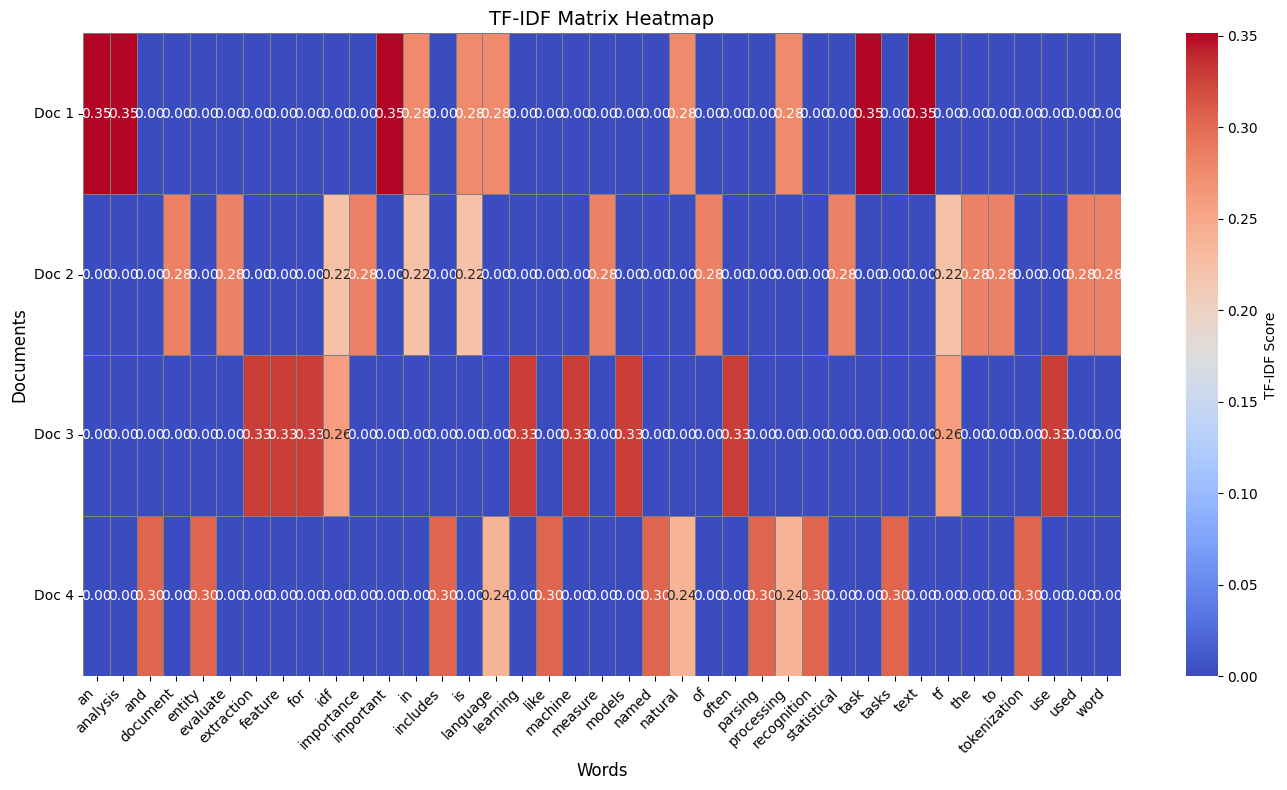

In [ ]:
# Create a DataFrame for visualization
df = pd.DataFrame(tfidf_array, index=[f"Doc {i+1}" for i in range(len(documents))], columns=feature_names)

# Enhanced Visualization
plt.figure(figsize=(14, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'TF-IDF Score'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("TF-IDF Matrix Heatmap", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Documents", fontsize=12)
plt.tight_layout()
plt.show()